In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [78]:
image = cv2.imread('sar_2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

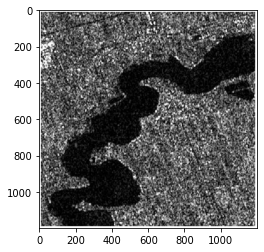

In [5]:
plt.imshow(image_gray, cmap="gray")

# Точечная бинаризация

In [52]:
import copy

bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

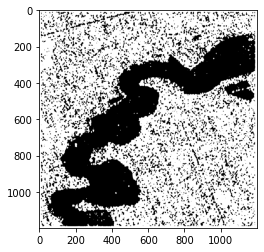

In [53]:
plt.imshow(bin_img, cmap="gray")

# Бинаризация Отсу

In [7]:
# otsu binarization
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

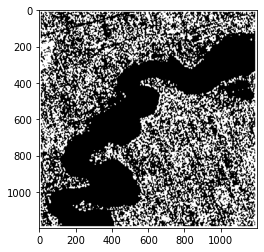

In [8]:
plt.imshow(th2, cmap="gray")

# Адаптивная бинаризация

In [42]:
# 
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)


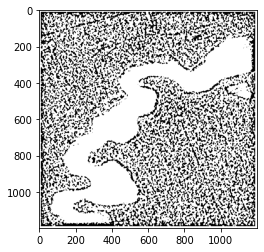

In [43]:
plt.imshow(th3, cmap="gray")

# Оператор Собеля

In [55]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

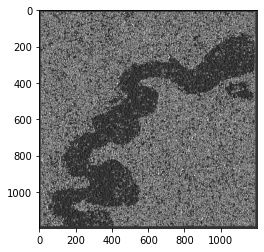

In [57]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

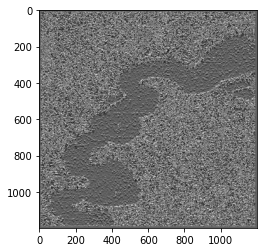

In [58]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

In [60]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0) # mean value between

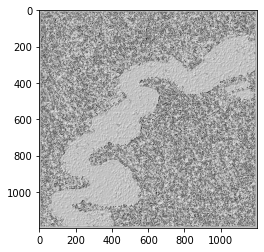

In [62]:
plt.imshow((grad - grad.min())*255, cmap="gray")

# Canny

In [64]:
edges = cv2.Canny(image_gray,100,200)

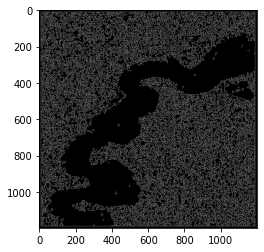

In [65]:
plt.imshow(edges, cmap="gray")

# Преобразование Хафа

In [127]:
image = cv2.imread('img_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

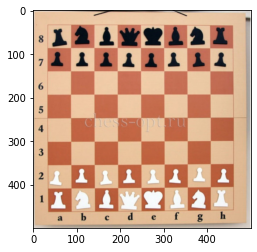

In [128]:
plt.imshow(image)

In [138]:
canny = cv2.Canny(image_gray,50,150,apertureSize = 3)

In [146]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 190)

In [147]:
import math 

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

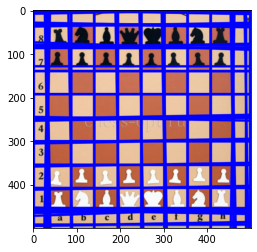

In [148]:
plt.imshow(image)

In [149]:
#ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

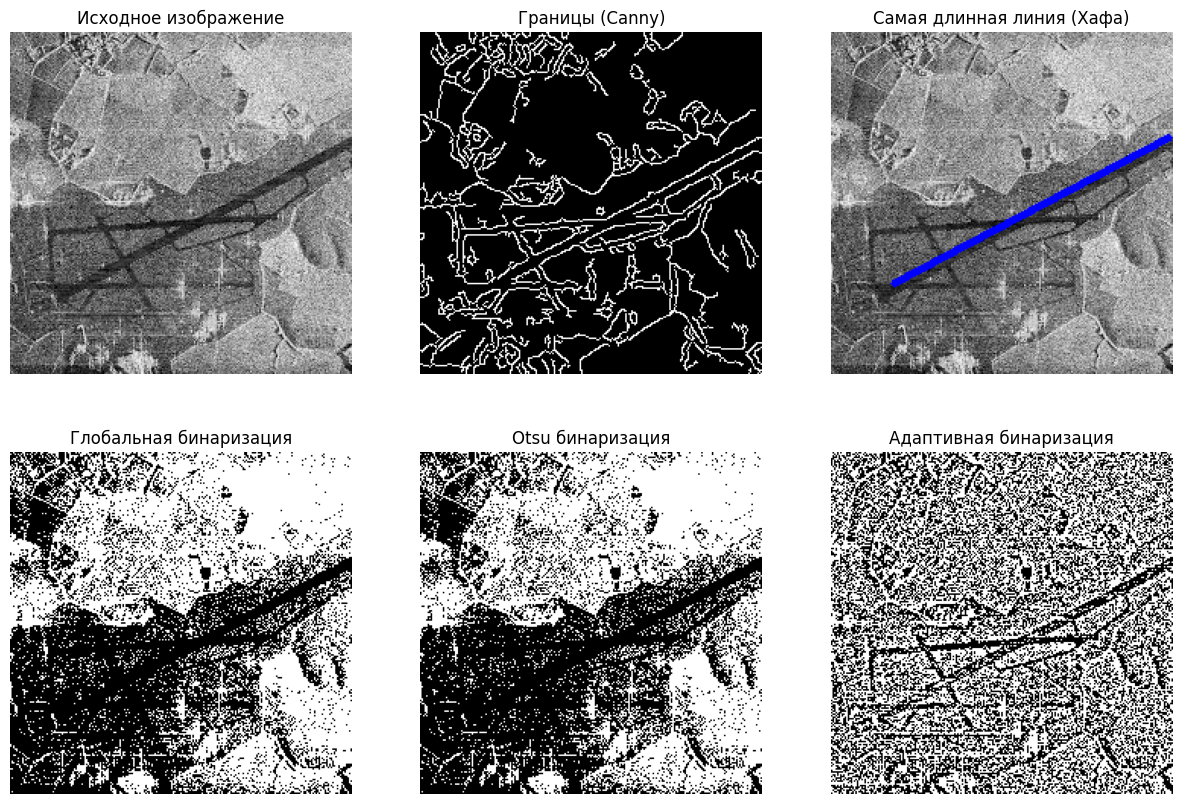

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "sar_3.jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# ============================================================
# 1. Преобразование Хафа (поиск самой длинной линии)
# ============================================================

# Предобработка
blurred = cv2.GaussianBlur(img, (5, 5), 1.5)
edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

# Прямые линии (Probabilistic Hough Transform)
linesP = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100,
                         minLineLength=100, maxLineGap=10)

# Рисуем все линии и ищем самую длинную
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
max_len = 0
longest_line = None

if linesP is not None:
    for line in linesP:
        x1, y1, x2, y2 = line[0]
        length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
        cv2.line(color_img, (x1, y1), (x2, y2), (0, 255, 0), 1)
        if length > max_len:
            max_len = length
            longest_line = (x1, y1, x2, y2)

if longest_line:
    x1, y1, x2, y2 = longest_line
    cv2.line(color_img, (x1, y1), (x2, y2), (255, 0, 0), 3)

# ============================================================
# 2. Бинаризация изображения
# ============================================================

# Глобальный порог
_, binary_global = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Порог Оцу
_, binary_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Адаптивная бинаризация
binary_adaptive = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 15, 5)


plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.title("Исходное изображение")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(2,3,2)
plt.title("Границы (Canny)")
plt.imshow(edges, cmap='gray')
plt.axis("off")

plt.subplot(2,3,3)
plt.title("Самая длинная линия (Хафа)")
plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(2,3,4)
plt.title("Глобальная бинаризация")
plt.imshow(binary_global, cmap='gray')
plt.axis("off")

plt.subplot(2,3,5)
plt.title("Otsu бинаризация")
plt.imshow(binary_otsu, cmap='gray')
plt.axis("off")

plt.subplot(2,3,6)
plt.title("Адаптивная бинаризация")
plt.imshow(binary_adaptive, cmap='gray')
plt.axis("off")

plt.show()
